Cargamos librerias

In [1]:
import pandas as pd
import numpy as np
#import mglearn

#Preprocesamiento
from sklearn.decomposition import PCA

#Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

#Otros
import os
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Cargamos los datos a modificar

In [2]:
test_17 = pd.read_csv("resultados-del-test-2017-18.csv",sep=";")
test_18 = pd.read_csv("resultados-del-test-2018-19.csv")
test_17.columns = test_18.columns.tolist()[0:15]
tests = [test_17,test_18]

Hacemos las modificaciones pertinentes

In [3]:
for test in tests:
    
    test["datime"] = pd.to_datetime(test["fecha"]+" "+test["hora"])
    #Hacemos una nueva variable datime y le introducimos los datos de fecha y hora
    
    
    test.drop(["fecha","hora"],axis = 1,inplace=True)
    
    
    

Nos traemos solo lo que vamos a clusterizar

In [4]:
test_17.head(3)

,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,datime
0,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B,2017-02-13 23:41:00
1,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B,2017-02-13 20:09:00
2,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C,2017-02-13 20:07:00


In [5]:
test_18.head(3)

,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,datime
0,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C,2019-01-23 17:31:00
1,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B,2019-01-23 13:59:00
2,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C,2019-01-23 10:24:00


In [6]:
#X_17 = np.array(pd.get_dummies(test_17.drop(["edad","genero","barrio","datime"],axis=1),drop_first=True))
X_18 = np.array(pd.get_dummies(test_18.drop(["edad","genero","barrio","datime"],axis=1),drop_first=True))

Hacemos una funcion para calcular y entregar:
* Los links
* Los graficos de los links

In [7]:
def evaluar_clusters(X, metodo,mostrar=False,regresar=False):
    # X: Datos a clusterizar
    # metodo: Tipo de link
    # mostrar: Imprimir o no un dendrograma
    # regresar: entregar datos en el formato (coeficiente, distancias)
    L = linkage(X, metodo)
    c, coph_dists = cophenet(L, pdist(X))
    if mostrar == True:
        print(metodo, c)
        plt.figure(figsize=[6,6])
        plt.title('Dendrogram - Method: ' + metodo.title())
        plt.xlabel('Index Numbers')
        plt.ylabel('Distance')
        dendrogram(L, leaf_rotation=90., leaf_font_size=5.)
        plt.plot()
    if regresar == True:
        return c,coph_dists,L

Corremos el programa para evaluar los distintos tipos de links (con el dataset chico)

ward 0.4690909735997232
single 0.4009183133770732
average 0.6814045198343657
complete 0.4962159960161871


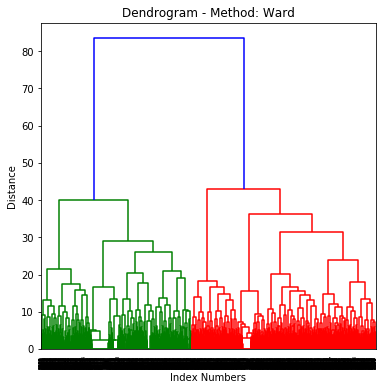

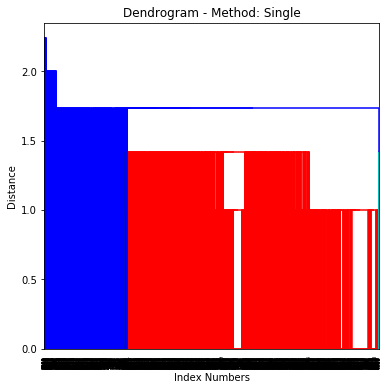

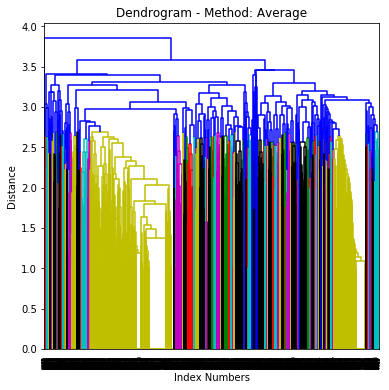

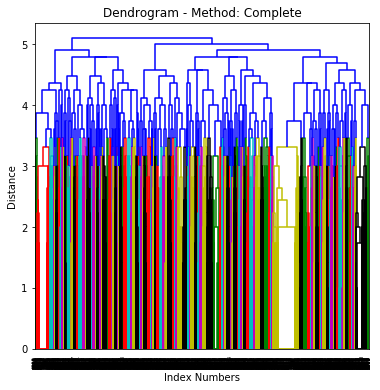

In [17]:
for i in ['ward','single','average','complete']:
    evaluar_clusters(X_18, i,mostrar=True)

Primero probamos con average ya que este tiene el resultado más alto.

In [9]:
aux ,Z_18,L = evaluar_clusters(X_18,"average",regresar=True)

clusters = fcluster(L,3, criterion='maxclust')
clusters

array([1, 2, 1, ..., 2, 2, 1], dtype=int32)

In [10]:
#Convertimos los datos en serie para traspasarlos al dataframe
test_18["cluster_avg"] = pd.Series(clusters,dtype=int)

In [11]:
test_18.head(5)

,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,datime,cluster_avg
0,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C,2019-01-23 17:31:00,1
1,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B,2019-01-23 13:59:00,2
2,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C,2019-01-23 10:24:00,1
3,30,Mujer,Otro,B,A,B,A,B,B,B,B,B,B,B,A,C,2019-01-23 00:20:00,2
4,27,Mujer,Caballito,B,C,B,B,C,C,C,C,B,C,C,C,C,2019-01-22 23:44:00,2


Hacemos el mismo proceso para el método ward, ya que en la grafica se puede ver unos grupos bastante bien distinguidos.

In [12]:
aux ,Z_18,L = evaluar_clusters(X_18,"ward",regresar=True)

clusters = fcluster(L,4, criterion='maxclust')
clusters

array([2, 4, 2, ..., 4, 4, 4], dtype=int32)

In [13]:
#Convertimos los datos en serie para traspasarlos al dataframe
test_18["cluster_ward"] = pd.Series(clusters,dtype=int)

Exportamos el dataset para hacer analisis posterior en otro notebook

In [15]:
test_18.to_csv("Test_18_clustering.csv")